In [1]:
import tensorflow as tf

In [2]:
from keras.preprocessing.image import ImageDataGenerator

In [3]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)
train_generator = train_datagen.flow_from_directory('dataset/train',
                                                   target_size =(64,64),
                                                   batch_size=32,
                                                   class_mode='binary')

Found 2002 images belonging to 2 classes.


In [4]:
test_datagen = ImageDataGenerator(rescale=1./255)
validation_generator = train_datagen.flow_from_directory('dataset/test',
                                                   target_size =(64,64),
                                                   batch_size=32,
                                                   class_mode='binary')


Found 400 images belonging to 2 classes.


In [5]:
cnn = tf.keras.models.Sequential()

In [6]:
cnn.add(tf.keras.layers.Conv2D(filters = 32,kernel_size = 3,activation ='relu'
                               ,input_shape = [64,64,3]))

In [7]:
cnn.add(tf.keras.layers.MaxPool2D(pool_size = 2 , strides = 2))

In [8]:
cnn.add(tf.keras.layers.Conv2D(filters = 32,kernel_size = 3,activation = 'relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size = 2 , strides = 2))

In [9]:
cnn.add(tf.keras.layers.Flatten())

In [10]:
cnn.add(tf.keras.layers.Dense(units=128,activation='relu'))

In [11]:
cnn.add(tf.keras.layers.Dense(units=1,activation='sigmoid'))

In [12]:
cnn.compile(optimizer = 'adam',loss = 'binary_crossentropy',metrics=['accuracy'])

In [13]:
history = cnn.fit(x = train_generator,validation_data = validation_generator,epochs=10)

Epoch 1/10
63/63 [==============================] - 14s 208ms/step - loss: 0.6978 - accuracy: 0.5350 - val_loss: 0.6873 - val_accuracy: 0.5500
Epoch 2/10
63/63 [==============================] - 13s 200ms/step - loss: 0.6691 - accuracy: 0.5904 - val_loss: 0.6912 - val_accuracy: 0.5375
Epoch 3/10
63/63 [==============================] - 13s 200ms/step - loss: 0.6419 - accuracy: 0.6394 - val_loss: 0.6622 - val_accuracy: 0.6325
Epoch 4/10
63/63 [==============================] - 13s 203ms/step - loss: 0.6282 - accuracy: 0.6653 - val_loss: 0.6852 - val_accuracy: 0.6050
Epoch 5/10
63/63 [==============================] - 14s 221ms/step - loss: 0.6002 - accuracy: 0.6768 - val_loss: 0.6331 - val_accuracy: 0.6625
Epoch 6/10
63/63 [==============================] - 13s 210ms/step - loss: 0.5814 - accuracy: 0.6858 - val_loss: 0.6232 - val_accuracy: 0.6625
Epoch 7/10
63/63 [==============================] - 14s 217ms/step - loss: 0.5654 - accuracy: 0.7113 - val_loss: 0.7055 - val_accuracy: 0.5925

In [24]:
import numpy as np
from keras.preprocessing import image
test_image = image.load_img("dataset/single_prediction/predict1.jpg",target_size=(64,64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image,axis=0)
result = cnn.predict(test_image)
train_generator.class_indices
if result[0][0]== 1:
    prediction = 'cat'
else:
    prediction = 'dog'

In [25]:
prediction

'dog'

In [26]:
import matplotlib.pyplot as plt
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


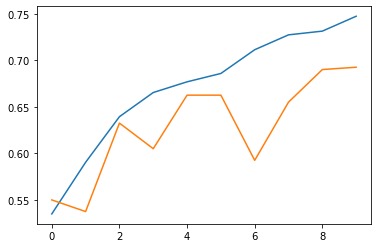

In [30]:
plt.plot(history.history['accuracy'])
#plt.plot(history.history['val_loss'])
plt.plot(history.history['val_accuracy'])